# Центральная предельная теорема своими руками
## Распределение Парето

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [80]:
#help(sts.pareto)
#создадим распределение Парето с функцией вероятностной плотности f(x, b) = \frac{b}{x^{b+1}}, для текущей задачи используем b=7
pareto_rv=sts.pareto(b=7)
sample = pareto_rv.rvs(1000)

C:\Users\Sanj1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


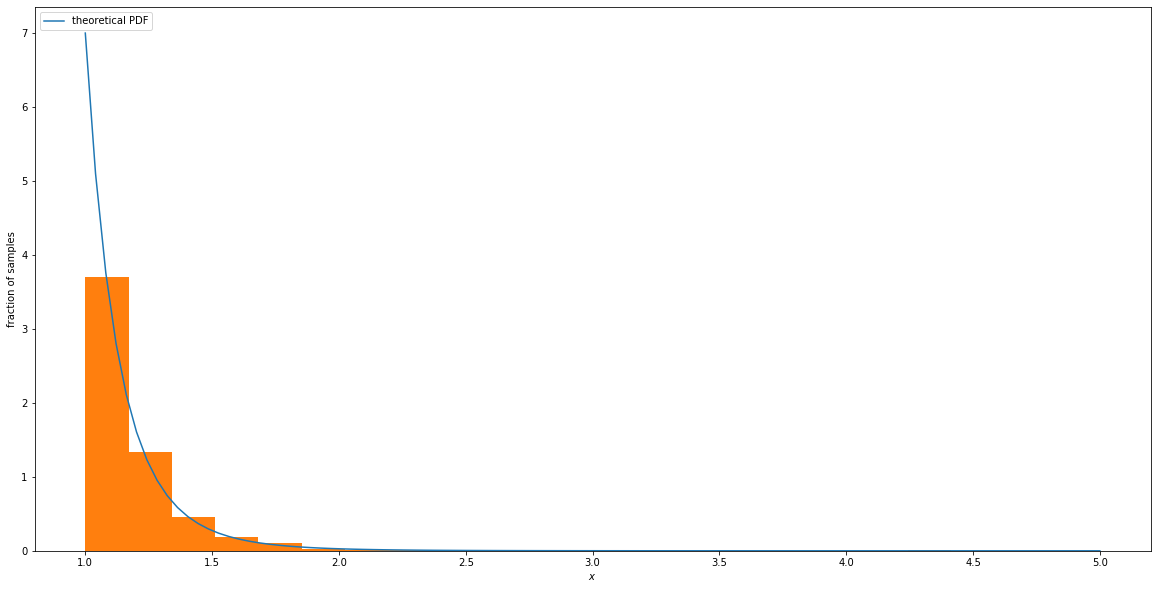

In [81]:
# определим подходящий размер для графика плотности распределения
plt.figure(figsize=(20,10))

# построим график теоретической плотности распределения
x = np.linspace(1,5,100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

# построим гистограмму выборки для фактического значения
plt.hist(sample,bins=20, normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

In [82]:
#создадим Dataframe, в котором будем хранить данные о средней полученных выборок
mean_results=pd.DataFrame()
# определим функцию, которая будет создавать выборку из n элементов 1000 раз
def sample_loop(n):
    temp_list=[]
    for i in range(1000):
        sample = pareto_rv.rvs(n)
        temp_list.append(sample.mean())
    return temp_list

In [83]:
# запустим функцию создания выборки пять раз, и запишем полученные данные в DataFrame
for i in range(5,26,5):
    mean_results=mean_results.append([sample_loop(i)])
mean_results['N count']=range(5,26,5)
mean_results.set_index('N count',inplace=True)
mean_results

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
N count,,,,,,,,,,,,,,,,,,,,,
5,1.211493,1.180485,1.112283,1.118205,1.116926,1.233093,1.059029,1.128296,1.064035,1.164089,...,1.234037,1.164637,1.116397,1.138920,1.110343,1.460281,1.114413,1.143549,1.234553,1.361714
10,1.243506,1.185201,1.217276,1.125050,1.093625,1.075951,1.168311,1.134228,1.148118,1.270730,...,1.196869,1.231272,1.132829,1.124486,1.082273,1.200496,1.153154,1.081209,1.138222,1.135563
15,1.188958,1.066783,1.186893,1.130286,1.260965,1.288046,1.123449,1.121368,1.116853,1.182351,...,1.187834,1.261515,1.186696,1.136743,1.123120,1.177977,1.182864,1.146218,1.108761,1.121709
20,1.116623,1.146372,1.160812,1.189369,1.269529,1.217780,1.144282,1.156081,1.148924,1.077856,...,1.154914,1.182743,1.126734,1.139404,1.079438,1.127698,1.129317,1.247078,1.175834,1.179276
25,1.164851,1.093463,1.161212,1.185333,1.163986,1.104836,1.212783,1.170287,1.126281,1.221529,...,1.200196,1.144969,1.120475,1.183184,1.157197,1.151971,1.212166,1.136316,1.108517,1.143444


После этого, перед созданием карты, нам необходимо указать формулы расчёта среднего и дисперсии согласно центральной предельной теореме ($B/(B-1)$ и $B/((B-1)^2*(B-2)*N)$), где B = 7, а N это объем выборки: </br>
После чего, посчитаем значения для созданного распределения (пока без учета N):

In [84]:
B=7
par_mean=B/(B-1) # среднее
par_variance=B/((B-1)**2*(B-2)) # дисперсия

print(par_mean,par_variance)
[pareto_rv.mean(),float(pareto_rv.std())**2] # std - это корень из дисперсии, данная строку я написал для перепроверки точности своих расчётов

1.1666666666666667 0.03888888888888889


[1.1666666666666667, 0.038888888888888896]

C:\Users\Sanj1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


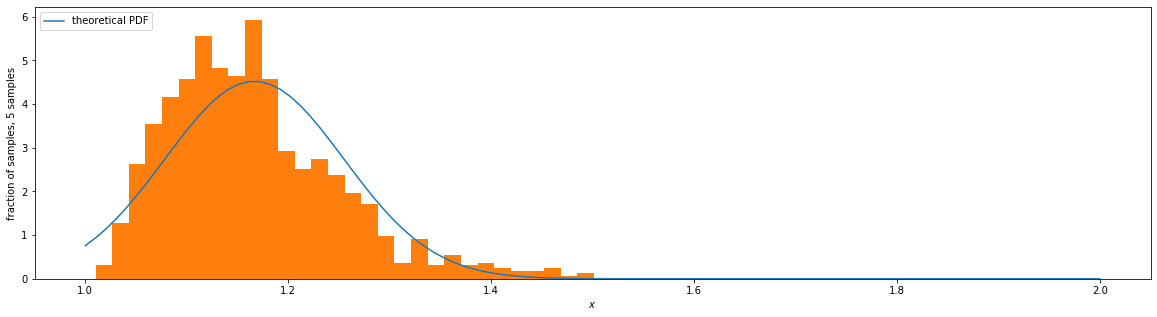

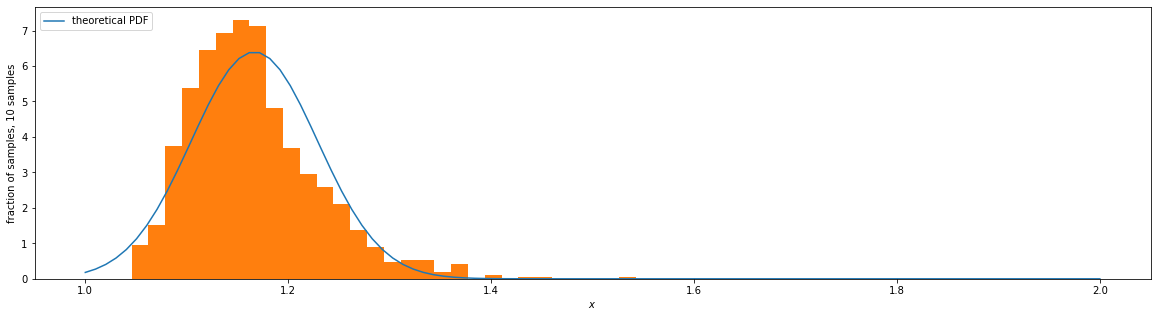

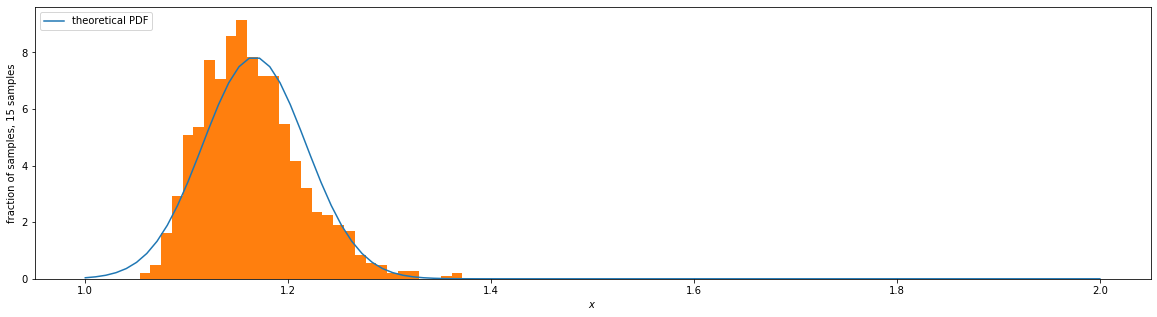

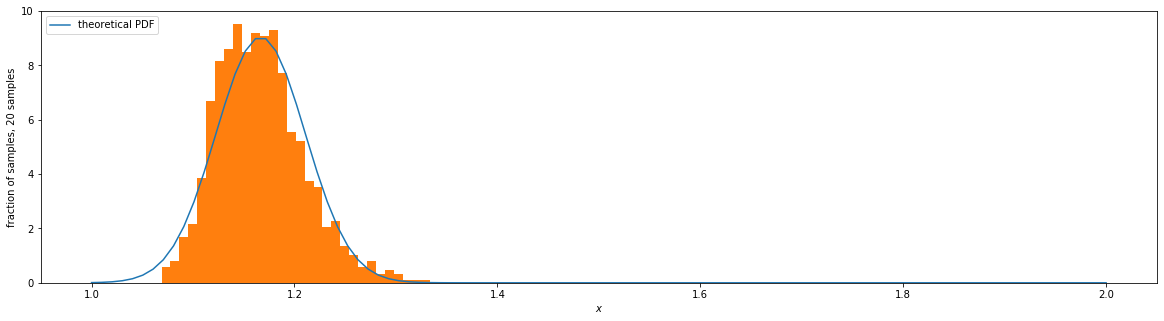

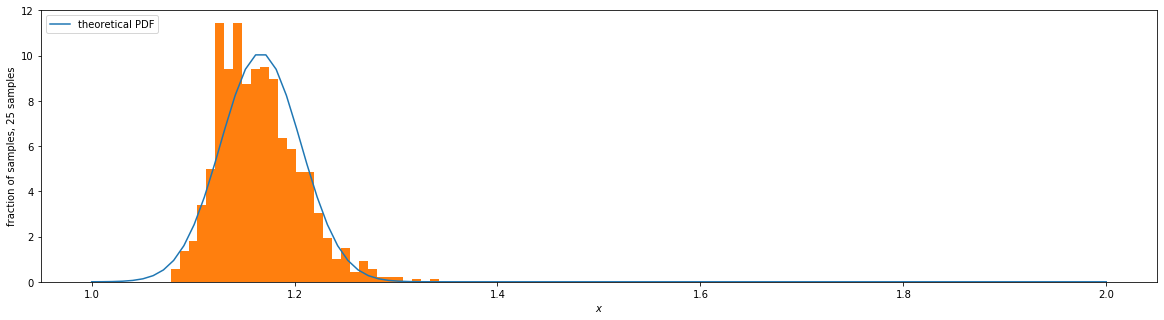

In [87]:
import math
i=0
# теперь запускаем цикл для построения графиков плотности распределения согласно ЦПТ и гистограммы полученных средних значений
for index,row in mean_results.iterrows():
    i+=1
    plt.figure(figsize=(20,5))
    plt.figure(i)
    norm=sts.norm(par_mean, math.sqrt(par_variance/index)) # это наше нормальное распределение, рассчитанное согласно ЦПТ, индексом мы указывали выборку
    x = np.linspace(1,2,100)
    pdf = norm.pdf(x)
    plt.plot(x, pdf, label='theoretical PDF')
    plt.hist(row,bins=30, normed=True) # вот это наша гистограмма, формируется из контретной выборки
    plt.ylabel('fraction of samples, {} samples'.format(index))
    plt.xlabel('$x$')
    plt.legend(loc='upper left')

# Выводы
Точность аппроксимации среднего значения увеличивается при увеличении объема выборки.
В связи с выбором распределения Парето, значения среднего очень близко находится к значению допустимого минимума (единица), поэтому на гистограмме вы видим некое искривление нормального распределения, наподобие такого же искривления, которое мы видели на занятиях при анализе дискретного распределения Бернулли